## Matplotlib基本图形

#### 折线图

- 使用Python基础环境，在命令行中安装命令： pip install matplotlib
- 使用Anaconda环境，就不用安装了，自带了
- 在Jupyter Notebook中安装 !pip install matplotlib

In [20]:
!pip install matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'd:\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [22]:
## 库的引入
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
data = pd.read_excel('折线图.xlsx')
data.head()

,日期,总销售额,FBA销售额,自配送销售额
0,42964,3211.87,1596.16,1615.71
1,42965,3376.35,1777.65,1598.70
2,42966,3651.55,2304.97,1239.75
3,42967,2833.74,1431.51,1402.23
4,42968,3232.76,1568.85,1663.91


- 这个结论仅适用于在Excel当中，跟我们之前讲解的时间戳一点关系都没有
- 之前我们讲解的时间戳是从1970年1月1日开始的，这两个没什么关系
- 当我们在Excel中存储日期格式的时候，把它变成一个数值格式的时候，会自动的从1900年1月1日开始算，变成数字1
- 1900年的2月实际上是有28天，但是Excel当中的计算是有29天，它算错了，这是Excel的一个bug，所以我们在计算的时候，从1900年1月1日开始时，就需要减去两天，其中一天是1900年1月1日这一天，另外一天是1900年2月多出来的这一天

In [24]:
data['日期'] = pd.to_datetime(data['日期']-2,unit='d',origin=pd.Timestamp('1900-01-01'))
data.head()

,日期,总销售额,FBA销售额,自配送销售额
0,2017-08-17,3211.87,1596.16,1615.71
1,2017-08-18,3376.35,1777.65,1598.70
2,2017-08-19,3651.55,2304.97,1239.75
3,2017-08-20,2833.74,1431.51,1402.23
4,2017-08-21,3232.76,1568.85,1663.91


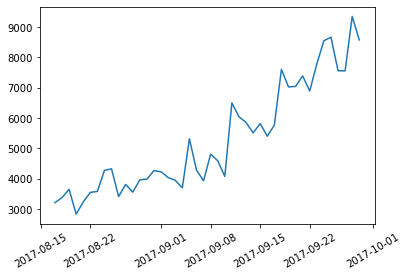

In [25]:
## 正式绘制折线图

# 设置x轴坐标倾斜
plt.xticks(rotation=30)

plt.plot(data['日期'],data['总销售额'])
plt.show()

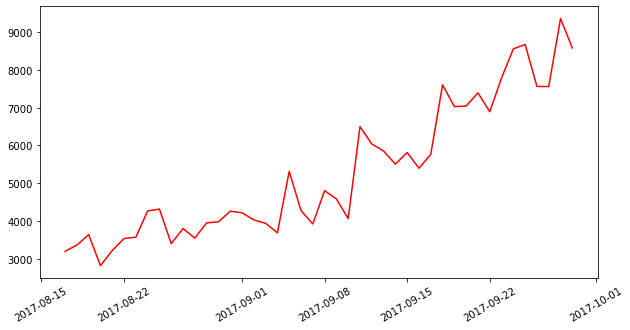

In [28]:
## 设置画布的大小
plt.figure(figsize=(10,5))

# 设置x轴坐标倾斜
plt.xticks(rotation=30)

# color参数是改变线条的颜色
plt.plot(data['日期'],data['总销售额'],color='red')
plt.show()

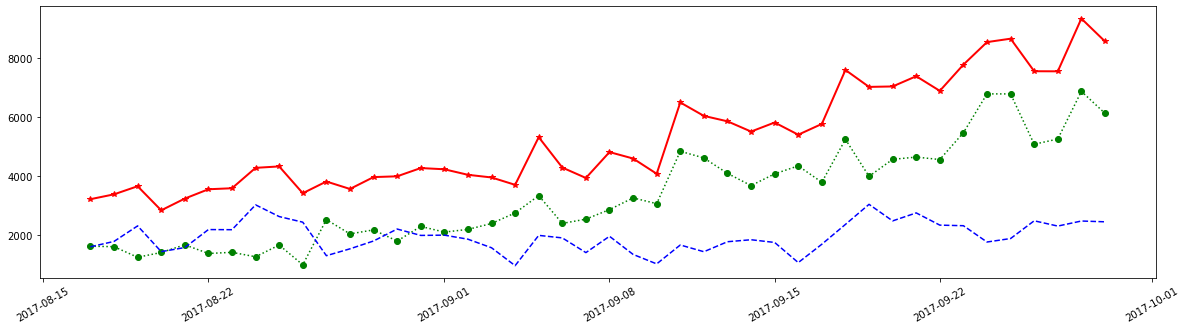

In [14]:
## 一个图上画多个线条
plt.figure(figsize=(20,5))

# 设置x轴坐标倾斜
plt.xticks(rotation=30)

# linewidth是控制线条的宽度
# marker是控制每一个坐标点上标记的样式
# linestyle是控制线的样式
plt.plot(data['日期'],data['总销售额'],color='red',linewidth=2,marker='*')
plt.plot(data['日期'],data['自配送销售额'],color='green',marker='o',linestyle=':')
plt.plot(data['日期'],data['FBA销售额'],color='blue',linestyle='--')

plt.show()

## 条形图

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


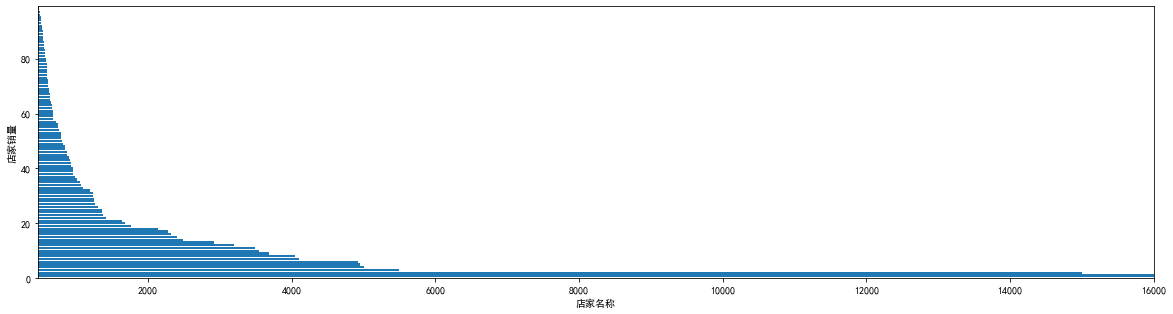

In [7]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.sans-serif'] = ['SimHei']

data = pd.read_excel('长尾分布.xlsx')
print(data.index.values)
plt.figure(figsize=(20,5))
plt.barh(data['排序'],data['销量'])


# 这是设置x轴的刻度
plt.xlim(np.min(data['销量']),np.max(data['销量']))

# 设置y轴的刻度
plt.ylim(data.index.values[0],data.index.values[-1])
plt.xlabel('店家名称')
plt.ylabel('店家销量')
plt.show()

## 饼图

In [47]:
## 饼图是显示比例最方便的图形

In [48]:
data = pd.read_excel('折线图.xlsx')
data.head()

,日期,总销售额,FBA销售额,自配送销售额
0,42964,3211.87,1596.16,1615.71
1,42965,3376.35,1777.65,1598.70
2,42966,3651.55,2304.97,1239.75
3,42967,2833.74,1431.51,1402.23
4,42968,3232.76,1568.85,1663.91


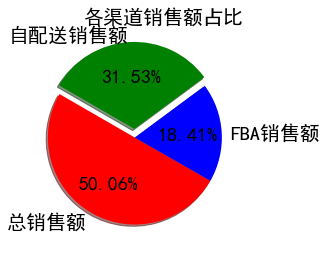

In [78]:
sum_sale = np.sum(data['总销售额'])
fba_sale = np.sum(data['FBA销售额'])
self_sale = np.sum(data['自配送销售额'])
data_list = [sum_sale,fba_sale,self_sale]
labels=['总销售额','FBA销售额','自配送销售额']
plt.pie(data_list,  # 这个数据
       labels=labels, # 这个是数据的说明
       colors=['red','blue','green'], # 这个是数据的颜色
        shadow=True, # 这个是是否有阴影
        labeldistance=1.1,  #这个是label距离图形的距离
        autopct='%.2f%%', # 这个是百分比的显示格式
        startangle=150,  #这个是图形的倾斜角度
        explode = [0,0,0.1] # 这个是哪一个部分凸显出来
       )

# 设置图形的title
plt.title("各渠道销售额占比",loc='right',fontdict={'family':'SimHei','size':'20'})

plt.show()

## 散点图

In [37]:
## 散点图有时也可以演化成气泡图
data = pd.read_excel('气泡图.xlsx')
data.head()

,产品编号,广告ROI,平均单个订单成本,订单额
0,1,15.0,6,700
1,2,12.0,30,8400
2,3,1.0,7,350
3,4,5.0,10,500
4,5,6.5,25,4000


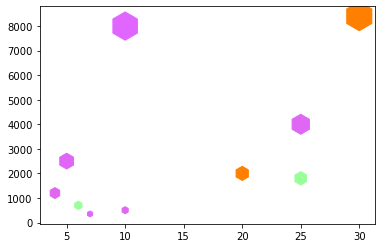

In [38]:
plt.scatter(data['平均单个订单成本'],data['订单额']
           ,s=data['订单额']/10  # 这个是控制球的大小
           ,marker='h'   # 这个是控制形状的
            ,c=["#9AFF9A",'#FF7F00','#E066FF','#E066F1','#E066F4','#E066F7',"#9AFF9A",'#FF7F00','#E066FF','#E066F1']
           )
'''
plt.scatter(data['平均单个订单成本'],data['订单额']
           ,s=data['订单额']/10  # 这个是控制球的大小
           ,marker='h'   # 这个是控制形状的
            ,cmap=lambda x:x*2
           )
'''
plt.show()

['#2C3B82', '#8794C2', '#0F6A80', '#0EC2A2', '#879773', '#2573D2', '#F2F0D2', '#8F4AD7', '#D640BF', '#3314AE']


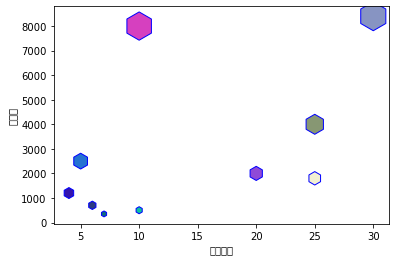

In [43]:
## 颜色是RGB值构成的
## RGB颜色对照表其实是有0到9以及字母A到F组成的16进制的一个数字

# 随机生成一个RGB颜色的函数
import random
def random_colors(numbers):
    colors = []
    number = 0
    while number < numbers:
        color_array = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
        color = ""
        for i in range(6):
            color += color_array[random.randint(0,len(color_array)-1)]
        color = "#" + color
        colors.append(color)
        number += 1
    return colors

colors = random_colors(10)
print(colors)
        

plt.scatter(data['平均单个订单成本'],data['订单额']
           ,s=data['订单额']/10  # 这个是控制球的大小
           ,marker='h'   # 这个是控制形状的
            ,c=colors
            ,linewidths=1  # 边框宽度
            ,edgecolors='b'
           )
plt.xlabel('订单成本')
plt.ylabel('订单额')
plt.show()


In [44]:
## 颜色的渐变

data1 = data.sort_values("订单额")
x = []
for i in data1.index.values:
    x.append(random.randint(10,1000))
data1['人力投入'] = x
data1.head()


,产品编号,广告ROI,平均单个订单成本,订单额,人力投入
2,3,1.0,7,350,923
3,4,5.0,10,500,540
0,1,15.0,6,700,789
9,10,7.5,4,1200,881
6,7,1.0,25,1800,763


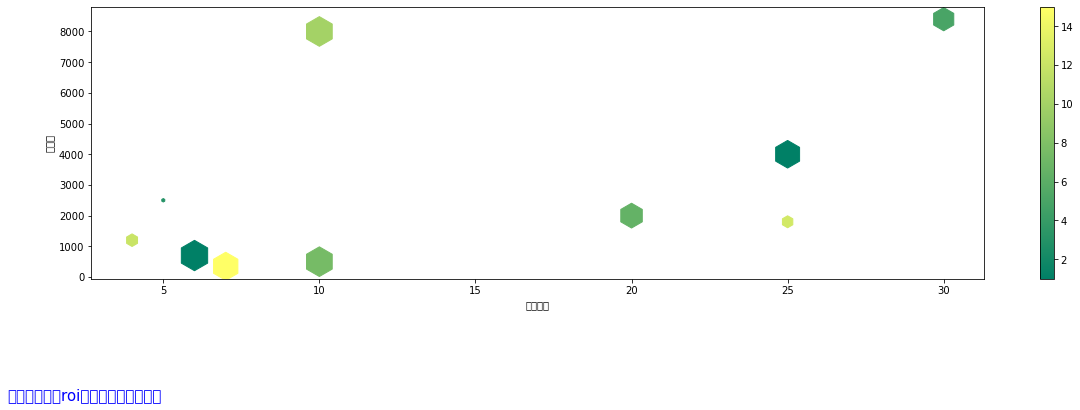

In [46]:
## 结合颜色，图形大小，x和y轴展示4维数据

plt.figure(figsize=(20,5))
# 渐变色是根据图的绘制顺序来进行排列的，所以需要先排序，然后再绘制，参照y轴的大小
# 根据大小设置渐变色

sc = plt.scatter(data['平均单个订单成本'],data['订单额']
           ,s=data1['人力投入']  # 这个是控制球的大小
           ,marker='h'   # 这个是控制形状的
            ,c=data1['广告ROI']  # 这样设置后，就是ROI越高的颜色越深
            ,cmap='summer'  # 这里可以百度一下，matplotlib cmap 看官网调整颜色
           )

plt.colorbar(sc)

plt.xlabel('订单成本')
plt.ylabel('订单额')

# 填写图的说明

plt.text(x=0,y=-4000,s='颜色深浅代表roi，大小代表人力投入',fontdict={'size':'15','color':'b'})


plt.show()



## 直方图

In [48]:
data = pd.read_excel('直方图.xlsx')
data.head()

,ship-state,数量,占据比例
0,CA,273,0.094268
1,FL,211,0.072859
2,TX,205,0.070787
3,NY,179,0.061809
4,IL,126,0.043508


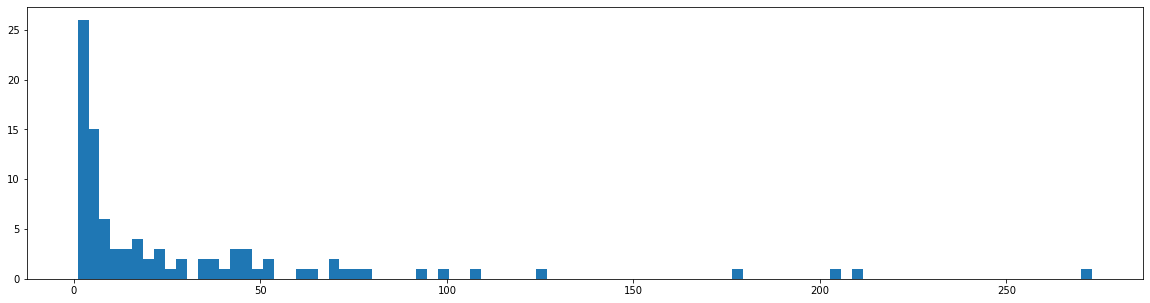

In [53]:
## 直方图的y轴表示数据的频数
plt.figure(figsize=(20,5))
plt.hist(data['数量']
        ,bins=data.index.values[-1])
plt.show()

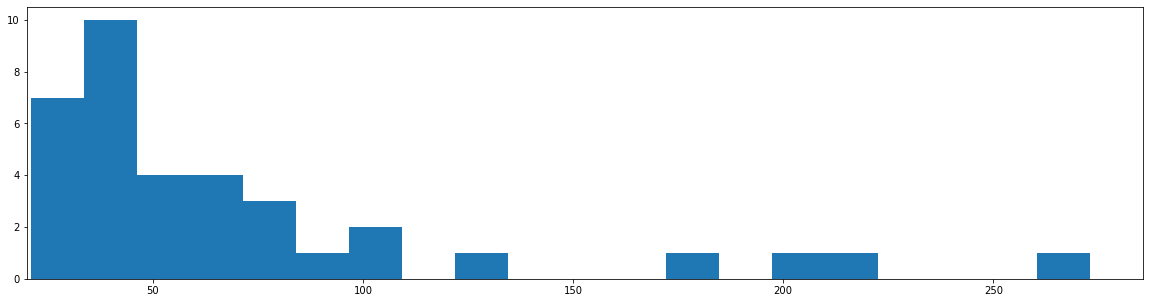

In [55]:
## 梳理一下数据，把数据过小的都给去掉
data1 = data[data['数量']>20]
plt.figure(figsize=(20,5))
plt.hist(data1['数量']
        ,bins=20  # 间隔数为20，20到30有7个数据，纵轴代表的是频数
        ,align='mid' # 显示在x坐标的左侧、右侧或者是中间
        ) 
plt.xlim(20)
plt.show()

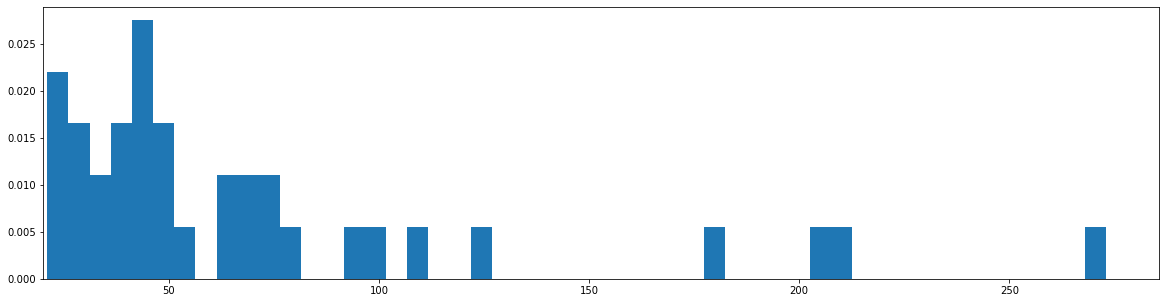

In [59]:
## 频率直方图
## 到现在，我们所画的直方图均为频数直方图，如果我们想要画一个频率直方图呢
## 通过函数中的参数density即可，density的类型是一个bool值，指定为True则为频率直方图，反之，是频数直方图

data1 = data[data['数量']>20]
plt.figure(figsize=(20,5))
plt.hist(data1['数量']
        ,bins=50  # 间隔数为20，20到30有7个数据，纵轴代表的是频数
        ,align='mid' # 显示在x坐标的左侧、右侧或者是中间
        ,density=True) 
plt.xlim(20)
plt.show()

## 箱型图

In [60]:
data = pd.read_excel('长尾分布.xlsx')
data.head()

,排序,销量
0,1,16000
1,2,15000
2,3,5500
3,4,5000
4,5,4951


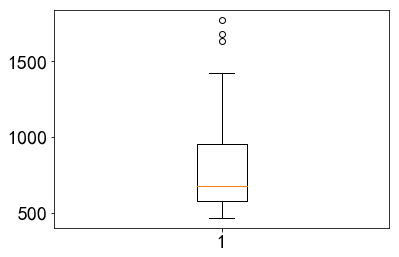

In [128]:
plt.boxplot(data[data['销量']<2000]['销量'])
plt.show()

In [ ]:
## 横线上边的可以看做是异常值，横线是上限值，依次往下是上4分位数、中位数、下4分位数、下限
## 上4分位数的意思是全部数据中有四分之一的数据比它大
## 下4分位数的意思是全部数据中有四分之一的数据比它小
## 中位数的意思就是位于中间的数据
## 上四分位数减去下四分位数代表着四分位间距，那么异常值就是大于(上四分位+1.5*四分位间距)或小于（下四分位-1.5*四分位间距）的数字
## 上限值就是等于（上四分位 + 1.5*四分位间距）的值

D:\programs\Anaconda\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\programs\Anaconda\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\programs\Anaconda\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\programs\Anaconda\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\programs\Anaconda\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\programs\Anaconda\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarni

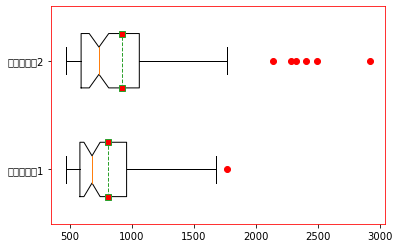

In [69]:
## 当参数的列表中，包含多组数据的时候可以同时绘制多个箱型图
data1 = [data[data['销量']<2000]['销量'],data[data['销量']<3000]['销量']]
plt.boxplot(data1
           ,notch=True # 这个表示是否是凹口的形式展现箱型图
            ,sym='r' # 这个是指定异常值显示的颜色
            ,vert = False # 这个参数是，是否要将箱型图垂直摆放，True就是垂直的意思，False就是横着摆放
            ,whis = 2 # 这个参数是在异常值的计算中，上下四分位的距离的倍数，默认是1.5
            ,widths=0.5  # 这个是设置箱型图的宽度
            ,labels = ['这是箱型图1','这是箱型图2'] # 这个参数是给箱型图加一个标签
            ,showmeans=True # 这个参数是以一个点的形式展现平均值
            ,meanline= True #以一个线的形式展现平均值，meanline的生效需要showmeans=True
            ,showfliers=True # 是否显示异常值,True是显示，False是不显示
            ,meanprops=dict(markerfacecolor='r',marker='s') # 设置平均线的样式
           
           )

ax = plt.gca()
ax.spines['right'].set_color('red')
ax.spines['left'].set_color('red')
ax.spines['top'].set_color('red')
ax.spines['bottom'].set_color('red')
plt.show()

## 堆积条形图

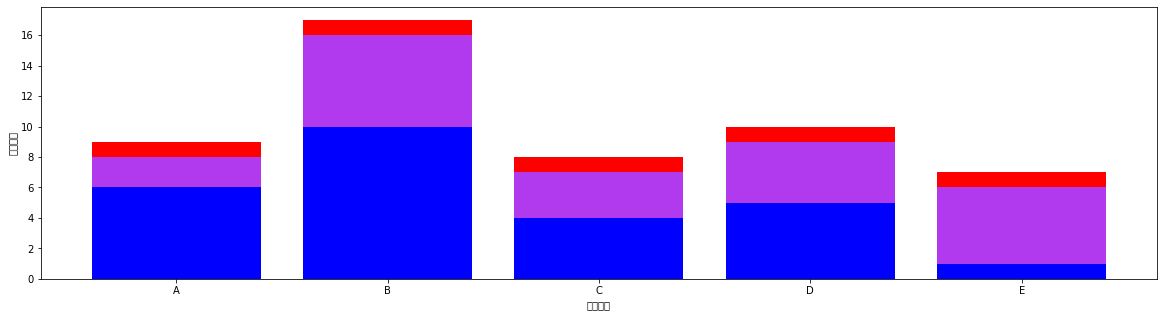

In [84]:
x = [1,2,3,4,5]
y = [6,10,4,5,1]
y1 = [2,6,3,4,5]
y2 = [1,1,1,1,1]
y3 = [8,16,7,9,6]

plt.figure(figsize=(20,5))
plt.bar(x,y,align='center',color='blue',tick_label=['A','B','C','D','E'],label='男人')

## 注意的参数是bottom,这个就是指定它的底部是谁
plt.bar(x,y1,align='center',color='#B23AEE',bottom=y,label='女人')
plt.bar(x,y2,align='center',color='red',bottom=y3,label='儿童')

plt.xlabel('城市代号')
plt.ylabel('男女比例')
plt.show()



## 子图绘制

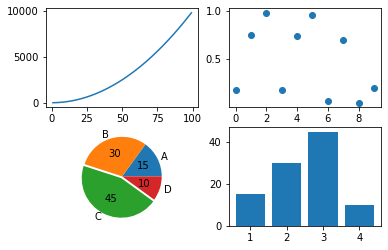

In [88]:
# 画第一个图，折线图
x = np.arange(1,100)
#print(x)
# 子图画布
plt.subplot(221)
plt.plot(x,x*x)


# 画第二个图，散点图
plt.subplot(222)
plt.scatter(np.arange(0,10), np.random.rand(10))

# 画第三个图，饼图
plt.subplot(223)
plt.pie(x=[15,30,45,10] ,labels=list('ABCD'), autopct='%.0f', explode=[0,0,0.05,0])

# 画第四个土，柱状图
plt.subplot(224)
plt.bar(x=[1,2,3,4],height=[15,30,45,10])

plt.show()

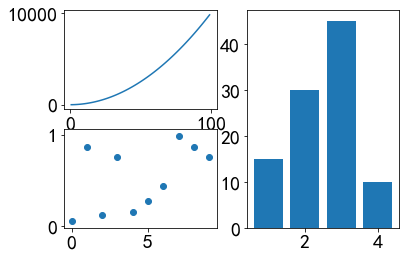

In [160]:
## 画不规则的多图
plt.subplot(221)
plt.plot(x,x*x)

plt.subplot(223)
plt.scatter(np.arange(0,10), np.random.rand(10))

plt.subplot(122)
plt.bar(x=[1,2,3,4],height=[15,30,45,10])

plt.show()

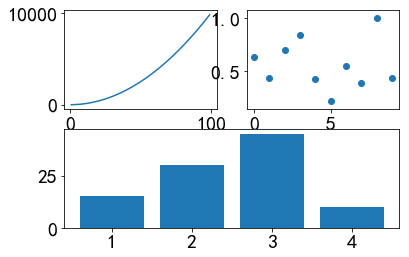

In [161]:
plt.subplot(221)
plt.plot(x,x*x)

plt.subplot(222)
plt.scatter(np.arange(0,10), np.random.rand(10))

plt.subplot(212)
plt.bar(x=[1,2,3,4],height=[15,30,45,10])

plt.show()